In [41]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import missingno
import warnings
from scripts1 import project_functions

data1 = project_functions.load_and_process('..\..\data\data_raw\*.csv')
data1
df = pd.DataFrame(data = data1)
df




,language,review,timestamp_created,timestamp_updated,recommended,votes_up,votes_funny,steam_algorithm_score,comment_count,received_for_free,written_during_early_access,num_games_owned,num_reviews,playtime_forever,playtime_last_two_weeks,playtime_at_review,last_played,game_id
0,english,always a good game but i think that they could...,1602026144,1602026144,True,0,0,0,0,False,False,38,3,21261,9353,21171,1602034134,(Action) 1085660_Destiny2
1,english,its fun,1602023991,1602023991,True,0,0,0,0,False,False,44,5,3650,543,3589,1602034461,(Action) 1085660_Destiny2
2,english,rip cade-6,1602023202,1602023202,True,0,0,0,0,False,False,24,1,9296,967,9296,1601950893,(Action) 1085660_Destiny2
3,english,I got the free version of Destiny 2 just to tr...,1602022671,1602022671,True,0,0,0,0,False,False,9,1,6108,1883,6108,1602019351,(Action) 1085660_Destiny2
4,english,BAD GAME FOR PEOPLE WHO LIKE YOU KNOW,1602021291,1602021291,False,0,0,0.476190477609634399,0,False,False,20,1,5883,407,5832,1602023952,(Action) 1085660_Destiny2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17619,english,Its good enough to buy it first on epic then o...,1584111753,1584111753,True,4,6,0.360521584749221802,0,False,False,231,2,3277,0,6,1599869794,(RPG) 397540_Borderlands3
17620,english,Can finally play it on an actual platform that...,1584111105,1584111105,True,103,33,0.568115293979644775,0,False,False,111,13,106,0,10,1585063492,(RPG) 397540_Borderlands3
17621,english,Epic Store is pure poison and i will never sup...,1584110944,1584110944,True,3090,254,0.781663954257965088,30,False,False,500,139,1297,0,9,1585247437,(RPG) 397540_Borderlands3
17622,english,"6 months late, but exactly what I was looking ...",1584110743,1584110743,True,89,13,0.546349525451660156,5,False,False,2261,319,11953,0,6,1599599812,(RPG) 397540_Borderlands3


In [42]:
## This function displays the size of the dataset in the form (# of rows, # of columns)
print(df.shape)

## This function displays the names of each individual column
print(df.columns)

(391332, 18)
Index(['language', 'review', 'timestamp_created', 'timestamp_updated',
       'recommended', 'votes_up', 'votes_funny', 'steam_algorithm_score',
       'comment_count', 'received_for_free', 'written_during_early_access',
       'num_games_owned', 'num_reviews', 'playtime_forever',
       'playtime_last_two_weeks', 'playtime_at_review', 'last_played',
       'game_id'],
      dtype='object')


In [43]:
## This function displays the number of unique results for each column
df.nunique(axis=0)

language                            1
review                         310922
timestamp_created              388619
timestamp_updated              388414
recommended                         2
votes_up                          550
votes_funny                       364
steam_algorithm_score           29790
comment_count                      94
received_for_free                   2
written_during_early_access         2
num_games_owned                  2294
num_reviews                       361
playtime_forever                84643
playtime_last_two_weeks          9528
playtime_at_review              65096
last_played                    367712
game_id                            15
dtype: int64

In [44]:
## This function provides a quick summary of the data, including count, mean, standard deviation, min and max for each variable.
df.describe(datetime_is_numeric=True)

,language,review,timestamp_created,timestamp_updated,recommended,votes_up,votes_funny,steam_algorithm_score,comment_count,received_for_free,written_during_early_access,num_games_owned,num_reviews,playtime_forever,playtime_last_two_weeks,playtime_at_review,last_played,game_id
count,391332,390325,391332,391332,391332,391332,391332,391332,391332,391332,391332,391332,391332,391332,391332,391256,391332,391332
unique,1,310922,388619,388414,2,550,364,29790,94,2,2,2294,361,84643,9528,65096,367712,15
top,english,good,1599758333,1599758333,True,0,0,0,0,False,False,4,1,579,0,181,1602030057,(Adventure) 252490_Rust
freq,391332,3877,5,5,354238,303572,356215,288322,378912,383279,373394,6557,105503,71,255269,274,23,75099


In [45]:
## This function organizes the dataset in a manner to only include quantitative information
df_quantitative = df.copy().drop(['language', 'review', 'recommended', 'received_for_free', 'written_during_early_access', 'game_id'], axis=1).astype(float)
df_quantitative

,timestamp_created,timestamp_updated,votes_up,votes_funny,steam_algorithm_score,comment_count,num_games_owned,num_reviews,playtime_forever,playtime_last_two_weeks,playtime_at_review,last_played
0,1.602026e+09,1.602026e+09,0.0,0.0,0.000000,0.0,38.0,3.0,21261.0,9353.0,21171.0,1.602034e+09
1,1.602024e+09,1.602024e+09,0.0,0.0,0.000000,0.0,44.0,5.0,3650.0,543.0,3589.0,1.602034e+09
2,1.602023e+09,1.602023e+09,0.0,0.0,0.000000,0.0,24.0,1.0,9296.0,967.0,9296.0,1.601951e+09
3,1.602023e+09,1.602023e+09,0.0,0.0,0.000000,0.0,9.0,1.0,6108.0,1883.0,6108.0,1.602019e+09
4,1.602021e+09,1.602021e+09,0.0,0.0,0.476190,0.0,20.0,1.0,5883.0,407.0,5832.0,1.602024e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
17619,1.584112e+09,1.584112e+09,4.0,6.0,0.360522,0.0,231.0,2.0,3277.0,0.0,6.0,1.599870e+09
17620,1.584111e+09,1.584111e+09,103.0,33.0,0.568115,0.0,111.0,13.0,106.0,0.0,10.0,1.585063e+09
17621,1.584111e+09,1.584111e+09,3090.0,254.0,0.781664,30.0,500.0,139.0,1297.0,0.0,9.0,1.585247e+09
17622,1.584111e+09,1.584111e+09,89.0,13.0,0.546350,5.0,2261.0,319.0,11953.0,0.0,6.0,1.599600e+09


In [46]:
## The function organizes the dataset in a manner to only include qualitative information
df_qualitative = df.copy().drop(['timestamp_created', 'timestamp_updated', 'votes_up', 'votes_funny', 'steam_algorithm_score', 'comment_count', 'num_games_owned', 'num_reviews', 'playtime_forever', 'playtime_last_two_weeks', 'playtime_at_review', 'last_played'], axis=1)
df_qualitative

,language,review,recommended,received_for_free,written_during_early_access,game_id
0,english,always a good game but i think that they could...,True,False,False,(Action) 1085660_Destiny2
1,english,its fun,True,False,False,(Action) 1085660_Destiny2
2,english,rip cade-6,True,False,False,(Action) 1085660_Destiny2
3,english,I got the free version of Destiny 2 just to tr...,True,False,False,(Action) 1085660_Destiny2
4,english,BAD GAME FOR PEOPLE WHO LIKE YOU KNOW,False,False,False,(Action) 1085660_Destiny2
...,...,...,...,...,...,...
17619,english,Its good enough to buy it first on epic then o...,True,False,False,(RPG) 397540_Borderlands3
17620,english,Can finally play it on an actual platform that...,True,False,False,(RPG) 397540_Borderlands3
17621,english,Epic Store is pure poison and i will never sup...,True,False,False,(RPG) 397540_Borderlands3
17622,english,"6 months late, but exactly what I was looking ...",True,False,False,(RPG) 397540_Borderlands3


In [47]:
## This functions provides some basic information about the quantitative data
df_quantitative.describe(datetime_is_numeric=True)

,timestamp_created,timestamp_updated,votes_up,votes_funny,steam_algorithm_score,comment_count,num_games_owned,num_reviews,playtime_forever,playtime_last_two_weeks,playtime_at_review,last_played
count,3.913320e+05,3.913320e+05,391332.000000,3.913320e+05,391332.000000,391332.000000,391332.000000,391332.000000,3.913320e+05,391332.000000,3.912560e+05,3.913320e+05
mean,1.574114e+09,1.576770e+09,1.568929,2.195122e+04,0.133362,0.101351,118.454916,7.701941,2.459457e+04,459.080668,1.435610e+04,1.591715e+09
std,3.417226e+07,3.131403e+07,31.533826,9.709606e+06,0.225149,1.417347,235.523867,19.703281,5.683561e+04,1385.852331,3.894235e+04,2.035310e+07
min,1.383929e+09,1.383929e+09,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,1.000000e+00,0.000000,1.000000e+00,1.385844e+09
25%,1.574020e+09,1.574965e+09,0.000000,0.000000e+00,0.000000,0.000000,18.000000,1.000000,2.626000e+03,0.000000,8.640000e+02,1.590107e+09
50%,1.582912e+09,1.584356e+09,0.000000,0.000000e+00,0.000000,0.000000,53.000000,3.000000,7.216000e+03,0.000000,3.113000e+03,1.598612e+09
75%,1.593716e+09,1.594345e+09,0.000000,0.000000e+00,0.428571,0.000000,134.000000,7.000000,2.178500e+04,114.000000,1.036900e+04,1.601617e+09
max,1.602088e+09,1.602088e+09,5015.000000,4.294967e+09,0.984642,176.000000,19072.000000,2037.000000,2.454791e+06,20190.000000,1.556556e+06,1.602104e+09


<AxesSubplot:xlabel='num_games_owned', ylabel='num_reviews'>

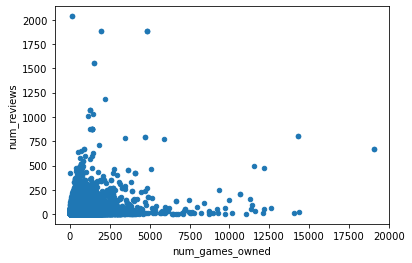

In [48]:
## This function creates a scatterplot of two variables, in this case 'num_games_owned' & 'num_reviews'
plot = df_quantitative.plot(kind='scatter', x='num_games_owned', y='num_reviews')
plot

(0.0, 1500.0)

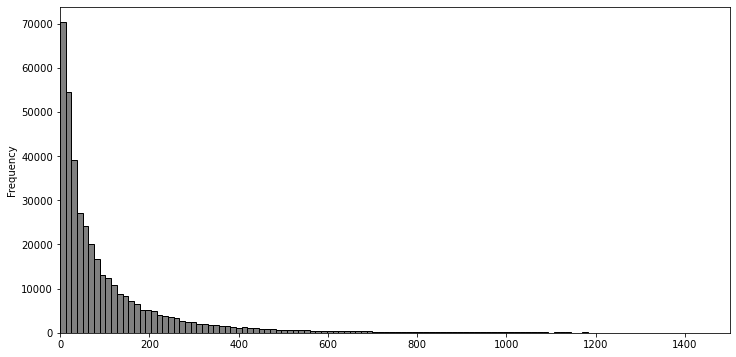

In [49]:
## This function creates a histogram for the data, in this case 'num_games_owned' is used
df['num_games_owned'].astype(float).plot(kind='hist', bins=1500, figsize=(12,6), facecolor='grey', edgecolor='black').set_xlim([0,1500])

<AxesSubplot:>

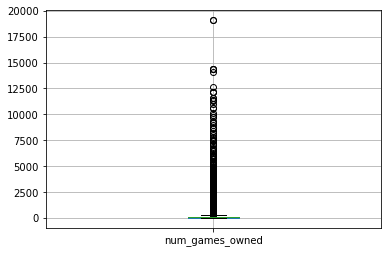

In [50]:
## This function provides a boxplot of the information, in this case
df_quantitative.boxplot('num_games_owned')

<AxesSubplot:>

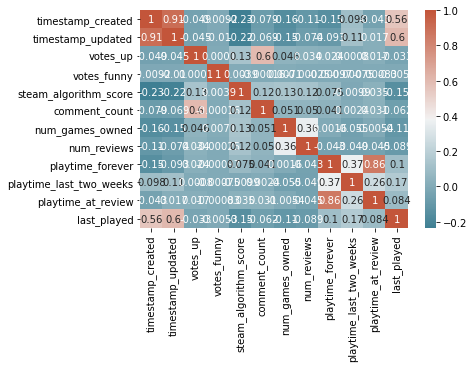

In [51]:
## This function provides a heatmap of the correlation between each variable
## A positive correlation coefficient means that as one increase the other increases as well
## A negative correlation coefficient means that as one increases the other will decrease
## A correlation coefficient of zero implies that there is no relationship between the variables
corr = df_quantitative.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [58]:
## These functions changed the form of time from epoch to standard date and 24 hour clock
df['timestamp_created'] = pd.to_datetime(df['timestamp_created'], unit='s')
df['timestamp_updated'] = pd.to_datetime(df['timestamp_updated'], unit='s')
df['last_played'] = pd.to_datetime(df['last_played'], unit='s')

In [59]:
## Please note the following code was originally found at "https://gist.github.com/jiahao87/c97214065f996b76ab8fe4ca1964b2b5"


import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

        
def time_series_plot(df):
    """Given dataframe, generate times series plot of numeric data by daily, monthly and yearly frequency"""
    print("\nTo check time series of numeric data  by daily, monthly and yearly frequency")
    if len(df.select_dtypes(include='datetime64').columns)>0:
        for col in df.select_dtypes(include='datetime64').columns:
            for p in ['D', 'M', 'Y']:
                if p=='D':
                    print("Plotting daily data")
                elif p=='M':
                    print("Plotting monthly data")
                else:
                    print("Plotting yearly data")
                for col_num in df.select_dtypes(include=np.number).columns:
                    __ = df.copy()
                    __ = __.set_index(col)
                    __T = __.resample(p).sum()
                    ax = __T[[col_num]].plot()
                    ax.set_ylim(bottom=0)
                    ax.get_yaxis().set_major_formatter(
                    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
                    plt.show()

                    
def numeric_eda(df, hue=None):
    """Given dataframe, generate EDA of numeric data"""
    print("\nTo check: \nDistribution of numeric data")
    display(df.describe().T)
    columns = df.select_dtypes(include=np.number).columns
    figure = plt.figure(figsize=(20, 10))
    figure.add_subplot(1, len(columns), 1)
    for index, col in enumerate(columns):
        if index > 0:
            figure.add_subplot(1, len(columns), index + 1)
        sns.boxplot(y=col, data=df, boxprops={'facecolor': 'None'})
    figure.tight_layout()
    plt.show()
    
    if len(df.select_dtypes(include='category').columns) > 0:
        for col_num in df.select_dtypes(include=np.number).columns:
            for col in df.select_dtypes(include='category').columns:
                fig = sns.catplot(x=col, y=col_num, kind='violin', data=df, height=5, aspect=2)
                fig.set_xticklabels(rotation=90)
                plt.show()
    
    # Plot the pairwise joint distributions
    print("\nTo check pairwise joint distribution of numeric data")
    if hue==None:
        sns.pairplot(df.select_dtypes(include=np.number))
    else:
        sns.pairplot(df.select_dtypes(include=np.number).join(df[[hue]]), hue=hue)
    plt.show()


def top5(df):
    """Given dataframe, generate top 5 unique values for non-numeric data"""
    columns = df.select_dtypes(include=['object', 'category']).columns
    for col in columns:
        print("Top 5 unique values of " + col)
        print(df[col].value_counts().reset_index().rename(columns={"index": col, col: "Count"})[
              :min(5, len(df[col].value_counts()))])
        print(" ")
    
    
def categorical_eda(df, hue=None):
    """Given dataframe, generate EDA of categorical data"""
    print("\nTo check: \nUnique count of non-numeric data\n")
    print(df.select_dtypes(include=['object', 'category']).nunique())
    top5(df)
    # Plot count distribution of categorical data
    for col in df.select_dtypes(include='category').columns:
        fig = sns.catplot(x=col, kind="count", data=df, hue=hue)
        fig.set_xticklabels(rotation=90)
        plt.show()
    

def eda(df):
    """Given dataframe, generate exploratory data analysis"""
    # check that input is pandas dataframe
    if type(df) != pd.core.frame.DataFrame:
        raise TypeError("Only pandas dataframe is allowed as input")
        
    # replace field that's entirely space (or empty) with NaN
    df = df.replace(r'^\s*$', np.nan, regex=True)

    print("Preview of data:")
    display(df.head(3))

    print("\nTo check: \n (1) Total number of entries \n (2) Column types \n (3) Any null values\n")
    print(df.info())

    # generate preview of entries with null values
    if df.isnull().any(axis=None):
        print("\nPreview of data with null values:")
        display(df[df.isnull().any(axis=1)].head(3))
        missingno.matrix(df)
        plt.show()

    # generate count statistics of duplicate entries
    if len(df[df.duplicated()]) > 0:
        print("\n***Number of duplicated entries: ", len(df[df.duplicated()]))
        display(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
    else:
        print("\nNo duplicated entries found")

    # EDA of categorical data
    categorical_eda(df)
    
    # EDA of numeric data
    numeric_eda(df)
        
    # Plot time series plot of numeric data
    time_series_plot(df)



In [60]:
## Provides information on the categorical data
categorical_eda(df)


To check: 
Unique count of non-numeric data

language                            1
review                         310922
recommended                         2
votes_up                          550
votes_funny                       364
steam_algorithm_score           29790
comment_count                      94
received_for_free                   2
written_during_early_access         2
num_games_owned                  2294
num_reviews                       361
playtime_forever                84643
playtime_last_two_weeks          9528
playtime_at_review              65096
game_id                            15
dtype: int64
Top 5 unique values of language
  language   Count
0  english  391332
 
Top 5 unique values of review
      review  Count
0       good   3877
1        yes   3518
2  good game   2459
3        fun   1768
4          .   1395
 
Top 5 unique values of recommended
  recommended   Count
0        True  354238
1       False   37094
 
Top 5 unique values of votes_up
  votes_up  

In [64]:
## This function shows the count of the top 5 most common results for each variable
top5(df)

Top 5 unique values of language
  language   Count
0  english  391332
 
Top 5 unique values of review
      review  Count
0       good   3877
1        yes   3518
2  good game   2459
3        fun   1768
4          .   1395
 
Top 5 unique values of recommended
  recommended   Count
0        True  354238
1       False   37094
 
Top 5 unique values of votes_up
  votes_up   Count
0        0  303572
1        1   56179
2        2   13958
3        3    5658
4        4    2778
 
Top 5 unique values of votes_funny
  votes_funny   Count
0           0  356215
1           1   24005
2           2    5000
3           3    1910
4           4     953
 
Top 5 unique values of steam_algorithm_score
  steam_algorithm_score   Count
0                     0  288322
1  0.523809552192687988   26905
2  0.476190477609634399    8109
3   0.52173912525177002    3153
4  0.545454561710357666    2563
 
Top 5 unique values of comment_count
  comment_count   Count
0             0  378912
1             1    6630
2       

array([[<AxesSubplot:title={'center':'timestamp_created'}>,
        <AxesSubplot:title={'center':'timestamp_updated'}>,
        <AxesSubplot:title={'center':'votes_up'}>],
       [<AxesSubplot:title={'center':'votes_funny'}>,
        <AxesSubplot:title={'center':'steam_algorithm_score'}>,
        <AxesSubplot:title={'center':'comment_count'}>],
       [<AxesSubplot:title={'center':'num_games_owned'}>,
        <AxesSubplot:title={'center':'num_reviews'}>,
        <AxesSubplot:title={'center':'playtime_forever'}>],
       [<AxesSubplot:title={'center':'playtime_last_two_weeks'}>,
        <AxesSubplot:title={'center':'playtime_at_review'}>,
        <AxesSubplot:title={'center':'last_played'}>]], dtype=object)

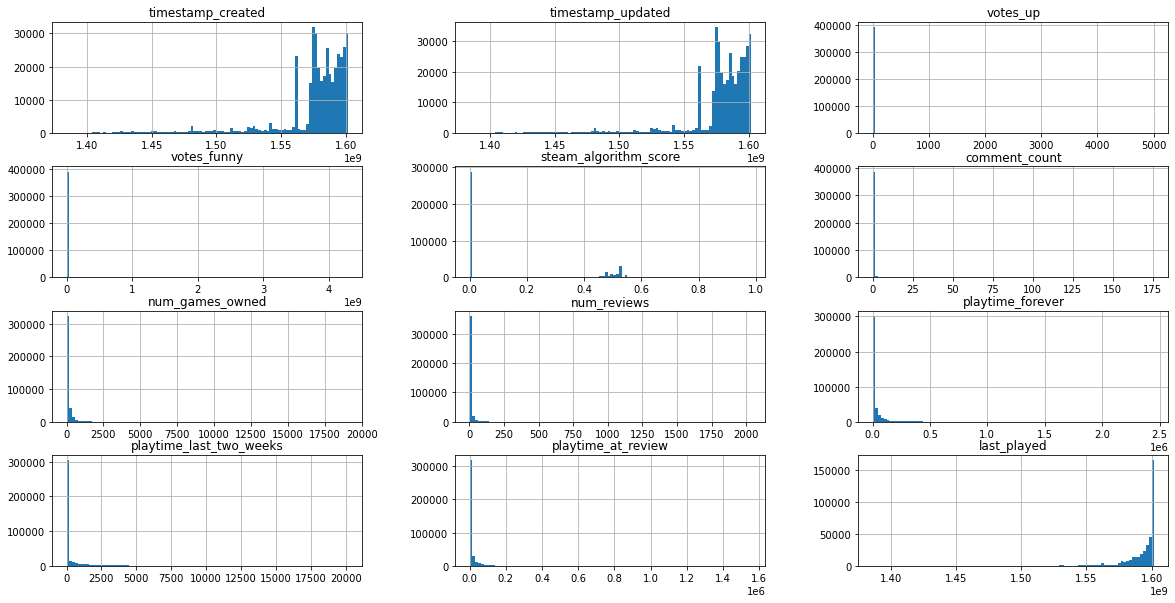

In [68]:
hist = df_quantitative.hist(bins=100, figsize=(20,10))
hist

<AxesSubplot:xlabel='num_games_owned', ylabel='count'>

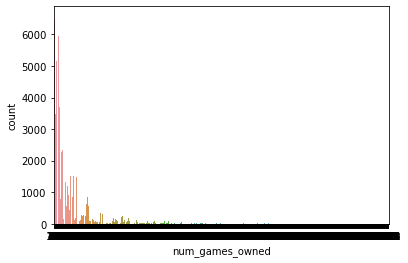

In [71]:
sns.countplot(data = df,  x='num_games_owned')

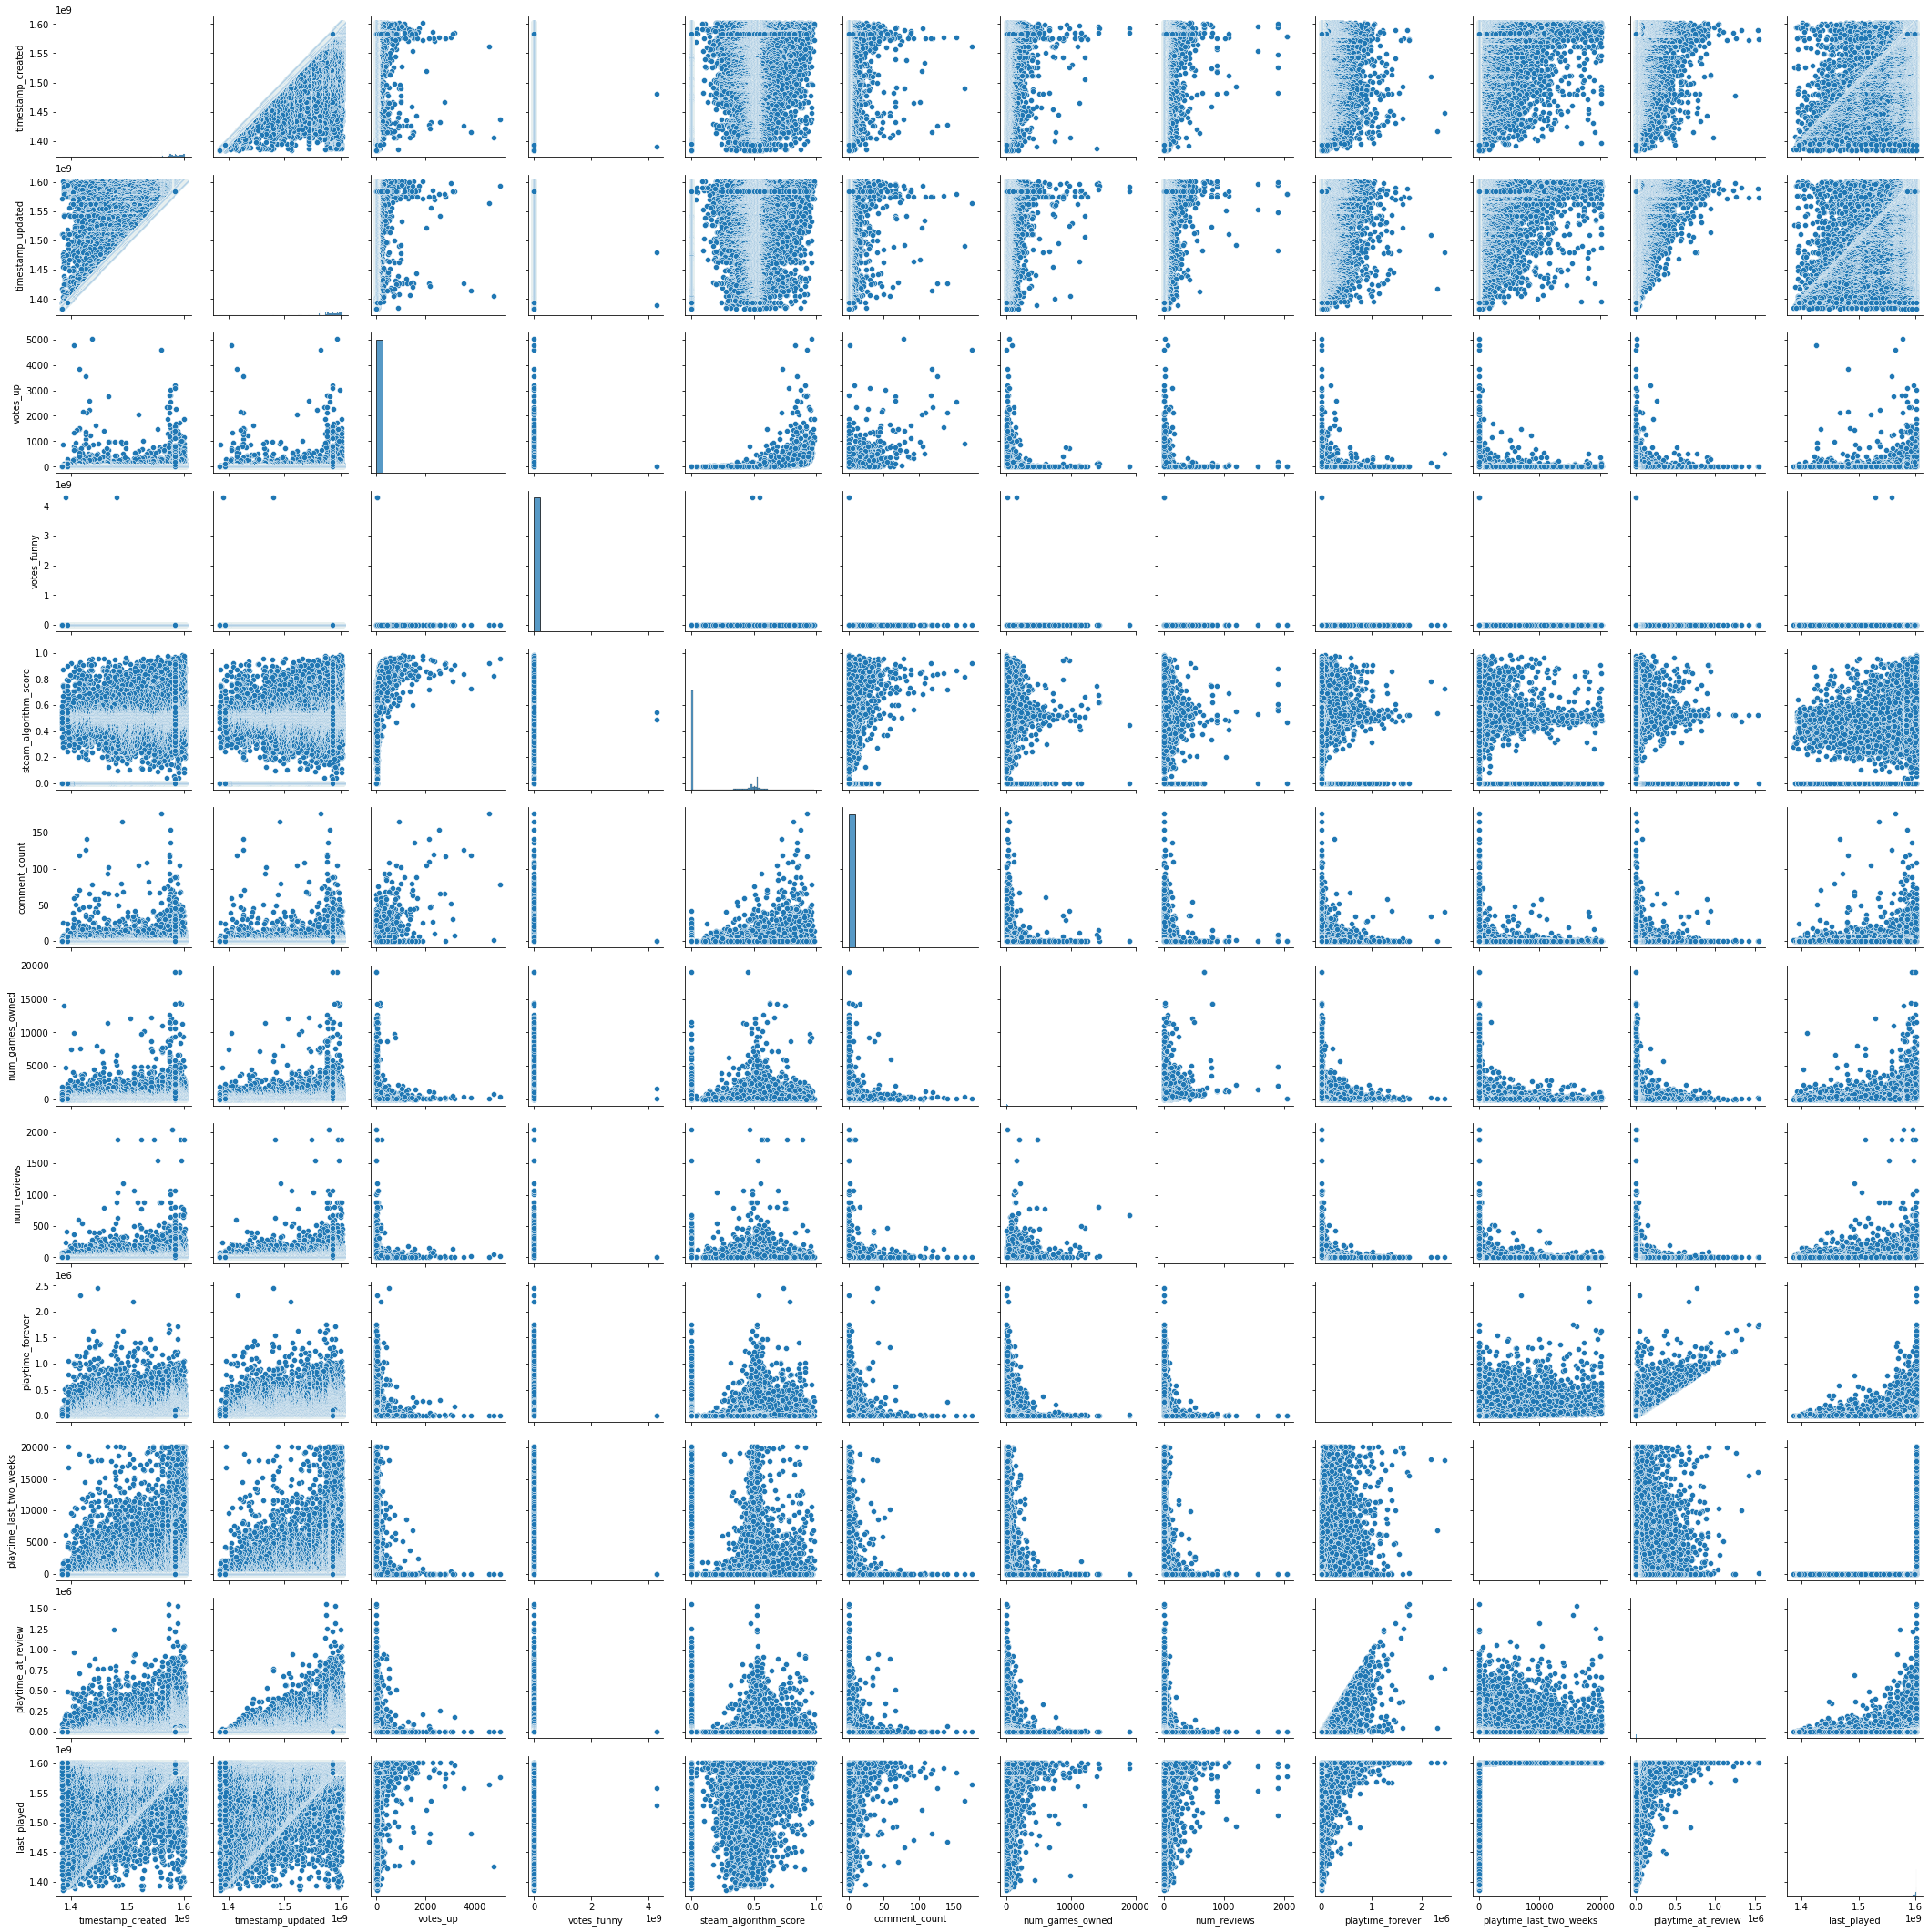

In [76]:
sns.pairplot(df_quantitative)